In [1]:
# Andrew Logue
# HW4

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [3]:
# 1. Arrange the data into featues and target arrays.

# Read in the digits
df  = pd.read_csv('digits_8K.csv')

X = df.iloc[:, 1:785]
y = df.iloc[:, 0]

print(df)
print(X)
print(y)
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
8031      2    0    0    0    0    0    0    0    0    0  ...      0      0   
8032      3    0    0    0    0    0    0    0    0    0  ...      0      0   
8033      4    0    0    0    0    0    0    0    0    0  ...      0      0   
8034      5    0    0    0    0    0    0    0    0    0  ...      0      0   
8035      5    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x

In [4]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=30, stratify=y)

In [5]:
# Check the df

#print(X_tr.head)
print(X_train)
print(y_train)


      1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
2665    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7531    0    0    0    0    0    0    0    0    0     0  ...      0      0   
3424    0    0    0    0    0    0    0    0    0     0  ...      0      0   
4612    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7646    0    0    0    0    0    0    0    0    0     0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
3432    0    0    0    0    0    0    0    0    0     0  ...      0      0   
6725    0    0    0    0    0    0    0    0    0     0  ...      0      0   
2877    0    0    0    0    0    0    0    0    0     0  ...      0      0   
7183    0    0    0    0    0    0    0    0    0     0  ...      0      0   
6903    0    0    0    0    0    0    0    0    0     0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  


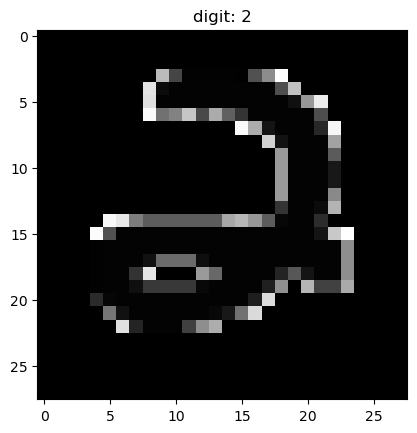

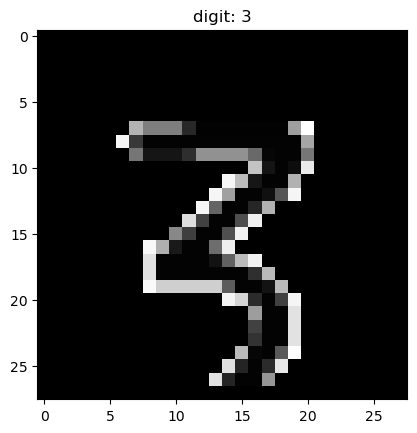

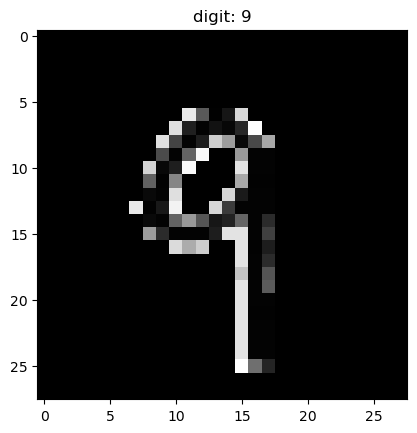

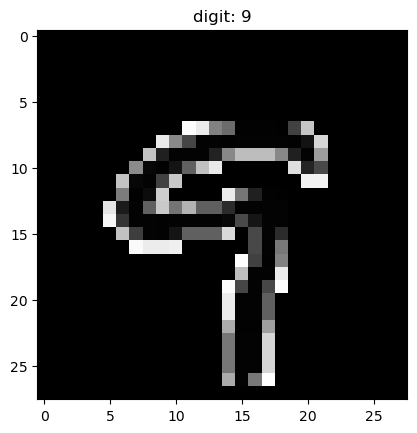

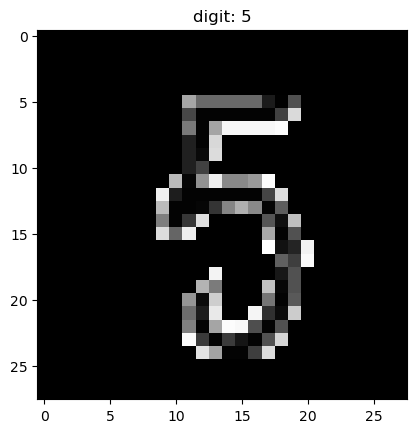

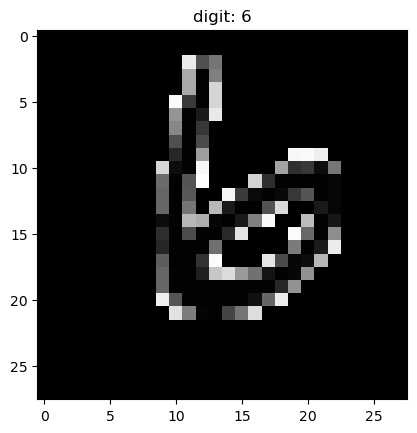

In [6]:
for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('digit: {0}'. format(y_test.values[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

In [7]:
print(df['label'].value_counts())

1    909
2    837
9    823
7    816
3    807
4    791
8    791
0    778
6    759
5    725
Name: label, dtype: int64


/tmp/ipykernel_282/1913103705.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  digit_count = digit_count[:10,]


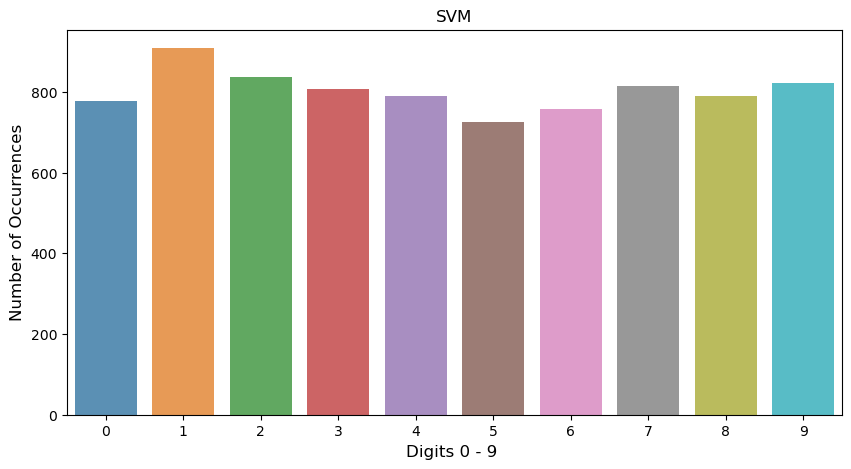

In [8]:
import seaborn as sns

digit_count  = df['label'].value_counts()
digit_count = digit_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x= digit_count.index, y=digit_count.values, alpha=0.8)
plt.title('SVM')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Digits 0 - 9 ', fontsize=12)
plt.show()

In [ ]:
# 3. Select the ML algorithm, and its parameteters
from sklearn.svm import SVC

svm = SVC(kernel='linear')

# svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)

svm.fit(X, y)

# X_combined_std = np.vstack((X_train_std, X_test_std))
# y_combined = np.hstack((y_train, y_test))

# plot_decision_regions(X_combined_std, y_combined, 
#                       classifier=svm, test_idx=range(105, 150))

# plt.xlabel('petal length [standardized]')
# plt.ylabel('petal width [standardized]')
# plt.legend(loc='upper left')
# plt.tight_layout()
# #plt.savefig('images/03_24.png', dpi=300)
# plt.show()

SVC(kernel='linear')

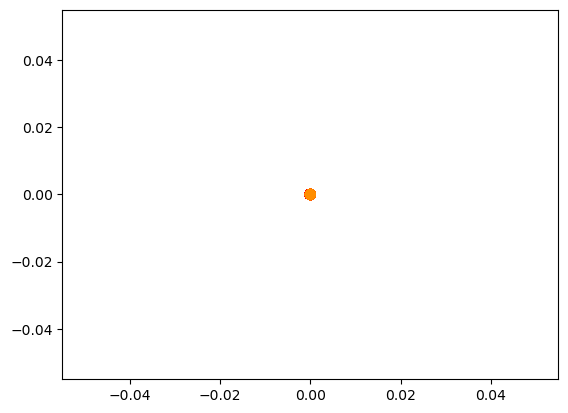

In [ ]:
# 5. Apply the model to the test data (.predict)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')

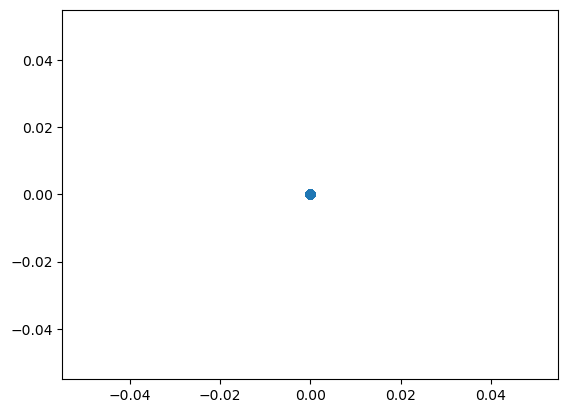

In [ ]:
# 6. Estimate performance (accuracy score)

plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but SVC is expecting 784 features as input.

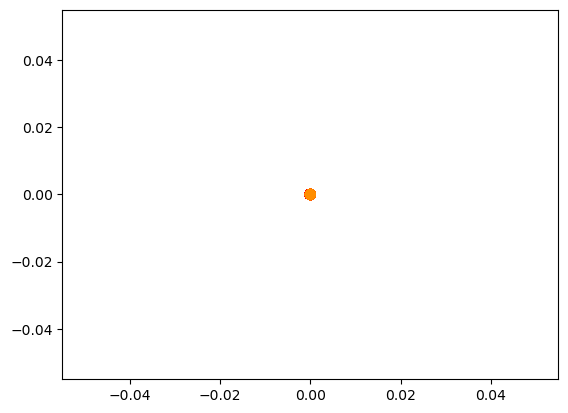

In [ ]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

In [ ]:
print(svm.support_vectors_)
print(svm.coef_)
print(svm.intercept_)